In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
data = pd.read_csv('data.csv')

In [10]:
data.head(10)

,dim_claim_id,dim_pa_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved,correct_diagnosis,tried_and_failed,contraindication,pa_approved,claim_reason,pa_feats
0,3,2.0,1,417740,A,76.0,0,1,0,0,1,CD,0
1,33,16.0,1,417740,A,76.0,0,1,1,1,0,CDTFCI,6
2,59,25.0,1,417740,A,76.0,0,1,0,0,1,CD,0
3,110,49.0,1,417740,B,70.0,0,1,0,0,0,CD,0
4,119,50.0,1,417740,B,70.0,0,1,0,0,0,CD,0
5,125,52.0,1,417740,B,70.0,0,1,0,0,0,CD,0
6,131,55.0,1,417740,B,70.0,0,1,0,0,0,CD,0
7,137,58.0,1,417740,B,70.0,0,1,1,0,1,CDTF,3
8,138,59.0,1,417740,B,70.0,0,1,0,0,0,CD,0
9,146,61.0,1,417740,B,70.0,0,1,0,0,1,CD,0


## One Hot Encoding PA features and drugs

In [11]:
dummies = pd.get_dummies(data['claim_reason'],drop_first=True)
data = pd.concat([data,dummies], axis= 1)
data.head()

,dim_claim_id,dim_pa_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved,correct_diagnosis,tried_and_failed,contraindication,pa_approved,claim_reason,pa_feats,CDCI,CDTF,CDTFCI,CI,None,TF,TFCI
0,3,2.0,1,417740,A,76.0,0,1,0,0,1,CD,0,0,0,0,0,0,0,0
1,33,16.0,1,417740,A,76.0,0,1,1,1,0,CDTFCI,6,0,0,1,0,0,0,0
2,59,25.0,1,417740,A,76.0,0,1,0,0,1,CD,0,0,0,0,0,0,0,0
3,110,49.0,1,417740,B,70.0,0,1,0,0,0,CD,0,0,0,0,0,0,0,0
4,119,50.0,1,417740,B,70.0,0,1,0,0,0,CD,0,0,0,0,0,0,0,0


Separating the dataset into three datasets by drug and making training and test dataframes.

In [12]:
from sklearn.model_selection import train_test_split

In [8]:
#X = data[['drug','reject_code','claim_reason']]
#y = data['pa_approved']

In [9]:
#X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=614,shuffle=True,stratify=y)

In [10]:
X_A = data_A[['CDCI','CDTF','CDTFCI','CI','None','TF','TFCI']]
y_A = data_A['pa_approved']
X_A_train, X_A_test,y_A_train,y_A_test = train_test_split(X_A,y_A,test_size=0.20,random_state=614,shuffle=True,stratify=y_A)

In [11]:
X_B = data_B[['CDCI','CDTF','CDTFCI','CI','None','TF','TFCI']]
y_B = data_B['pa_approved']
X_B_train, X_B_test,y_B_train,y_B_test = train_test_split(X_B,y_B,test_size=0.20,random_state=614,shuffle=True,stratify=y_B)

In [12]:
X_C = data_C[['CDCI','CDTF','CDTFCI','CI','None','TF','TFCI']]
y_C = data_C['pa_approved']
X_C_train, X_C_test,y_C_train,y_C_test = train_test_split(X_C,y_C,test_size=0.20,random_state=614,shuffle=True,stratify=y_C)

In [36]:
data_drugs = data.copy()
dummies_drugs = pd.get_dummies(data['drug'],drop_first=True)
data_drugs = pd.concat([data_drugs,dummies_drugs], axis= 1)
data_drugs.head()

,dim_claim_id,dim_pa_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved,correct_diagnosis,tried_and_failed,contraindication,...,claim_reason,CDCI,CDTF,CDTFCI,CI,None,TF,TFCI,B,C
0,3,2.0,1,417740,A,76.0,0,1,0,0,...,CD,0,0,0,0,0,0,0,0,0
1,33,16.0,1,417740,A,76.0,0,1,1,1,...,CDTFCI,0,0,1,0,0,0,0,0,0
2,59,25.0,1,417740,A,76.0,0,1,0,0,...,CD,0,0,0,0,0,0,0,0,0
3,110,49.0,1,417740,B,70.0,0,1,0,0,...,CD,0,0,0,0,0,0,0,1,0
4,119,50.0,1,417740,B,70.0,0,1,0,0,...,CD,0,0,0,0,0,0,0,1,0


In [37]:
X_drugs = data_drugs[['B','C','CDCI','CDTF','CDTFCI','CI','None','TF','TFCI']]
y_drugs = data_drugs['pa_approved']
X_drugs_train, X_drugs_test,y_drugs_train,y_drugs_test = train_test_split(X_drugs,y_drugs,test_size=0.20,random_state=614,shuffle=True,stratify=y_drugs)

### Decision Tree Classifier

In [13]:
tree = DecisionTreeClassifier(random_state=614)

In [14]:
tree.fit(X_A_train,y_A_train)

DecisionTreeClassifier(random_state=614)

In [15]:
## Accuracy
from sklearn.metrics import accuracy_score
## Precision
from sklearn.metrics import precision_score
## Recall
from sklearn.metrics import recall_score


In [16]:
y_pred = tree.predict(X_A_test)
print("accuracy is", accuracy_score(y_A_test,y_pred))
print("precision is",precision_score(y_A_test,y_pred))
print("recall is", recall_score(y_A_test,y_pred))

accuracy is 0.9011090573012939
precision is 0.9011090573012939
recall is 1.0


In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [18]:
## Performing 10-fold Cross-validation
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
accs = np.zeros((10,1))
precs = np.zeros((10,1))
recs = np.zeros((10,1))
tree_clf = DecisionTreeClassifier(random_state=614)
i=0
for train_index,test_index in kfold.split(X_A_train,y_A_train):
    X_train_train,X_train_test = X_A_train.iloc[train_index],X_A_train.iloc[test_index]
    y_train_train,y_train_test = y_A_train.iloc[train_index],y_A_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
    tree_clf_clone = clone(tree_clf)
    tree_clf_clone.fit(X_train_train,y_train_train)
    y_predict = tree_clf_clone.predict(X_train_test)
    accs[i,0] = accuracy_score(y_train_test,y_predict)
    precs[i,0] = precision_score(y_train_test,y_predict)
    recs[i,0] = recall_score(y_train_test,y_predict)
    i = i + 1


In [19]:
print("CV Mean Accuracy is",np.mean(accs,axis=0))
print("CV Mean Precision is",np.mean(precs,axis=0))
print("CV Mean Recall is",np.mean(recs,axis=0))

CV Mean Accuracy is [0.90119051]
CV Mean Precision is [0.90119051]
CV Mean Recall is [1.]


In [20]:
## Performing 10-fold Cross-validation
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
accs = np.zeros((10,1))
precs = np.zeros((10,1))
recs = np.zeros((10,1))
tree_clf = DecisionTreeClassifier(random_state=614)
i=0
for train_index,test_index in kfold.split(X_B_train,y_B_train):
    X_train_train,X_train_test = X_B_train.iloc[train_index],X_B_train.iloc[test_index]
    y_train_train,y_train_test = y_B_train.iloc[train_index],y_B_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
    tree_clf_clone = clone(tree_clf)
    tree_clf_clone.fit(X_train_train,y_train_train)
    y_predict = tree_clf_clone.predict(X_train_test)
    accs[i,0] = accuracy_score(y_train_test,y_predict)
    precs[i,0] = precision_score(y_train_test,y_predict)
    recs[i,0] = recall_score(y_train_test,y_predict)
    i = i + 1

print("CV Mean Accuracy is",np.mean(accs,axis=0))
print("CV Mean Precision is",np.mean(precs,axis=0))
print("CV Mean Recall is",np.mean(recs,axis=0))

CV Mean Accuracy is [0.65828572]
CV Mean Precision is [0.56035803]
CV Mean Recall is [0.5747816]


In [21]:
## Performing 10-fold Cross-validation
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
accs = np.zeros((10,1))
precs = np.zeros((10,1))
recs = np.zeros((10,1))
tree_clf = DecisionTreeClassifier(random_state=614)
i=0
for train_index,test_index in kfold.split(X_C_train,y_C_train):
    X_train_train,X_train_test = X_C_train.iloc[train_index],X_C_train.iloc[test_index]
    y_train_train,y_train_test = y_C_train.iloc[train_index],y_C_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
    tree_clf_clone = clone(tree_clf)
    tree_clf_clone.fit(X_train_train,y_train_train)
    y_predict = tree_clf_clone.predict(X_train_test)
    accs[i,0] = accuracy_score(y_train_test,y_predict)
    precs[i,0] = precision_score(y_train_test,y_predict)
    recs[i,0] = recall_score(y_train_test,y_predict)
    i = i + 1

print("CV Mean Accuracy is",np.mean(accs,axis=0))
print("CV Mean Precision is",np.mean(precs,axis=0))
print("CV Mean Recall is",np.mean(recs,axis=0))

CV Mean Accuracy is [0.83710732]
CV Mean Precision is [0.84214251]
CV Mean Recall is [0.99035371]


In [22]:
## Performing 10-fold Cross-validation while iterating max_depth
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
n=10
accs = np.zeros((10,n))
precs = np.zeros((10,n))
recs = np.zeros((10,n))
for j in range(1,n+1):
    tree_clf = DecisionTreeClassifier(max_depth=j,random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_A_train,y_A_train):
        X_train_train,X_train_test = X_A_train.iloc[train_index],X_A_train.iloc[test_index]
        y_train_train,y_train_test = y_A_train.iloc[train_index],y_A_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
        tree_clf_clone = clone(tree_clf)
        tree_clf_clone.fit(X_train_train,y_train_train)
        y_predict = tree_clf_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs[i,j-1] = precision_score(y_train_test,y_predict)
        recs[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs,axis=0))
print("CV Mean Precision is",np.mean(precs,axis=0))
print("CV Mean Recall is",np.mean(recs,axis=0))

CV Mean Accuracy is [0.90119051 0.90119051 0.90119051 0.90119051 0.90119051 0.90119051
 0.90119051 0.90119051 0.90119051 0.90119051]
CV Mean Precision is [0.90119051 0.90119051 0.90119051 0.90119051 0.90119051 0.90119051
 0.90119051 0.90119051 0.90119051 0.90119051]
CV Mean Recall is [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


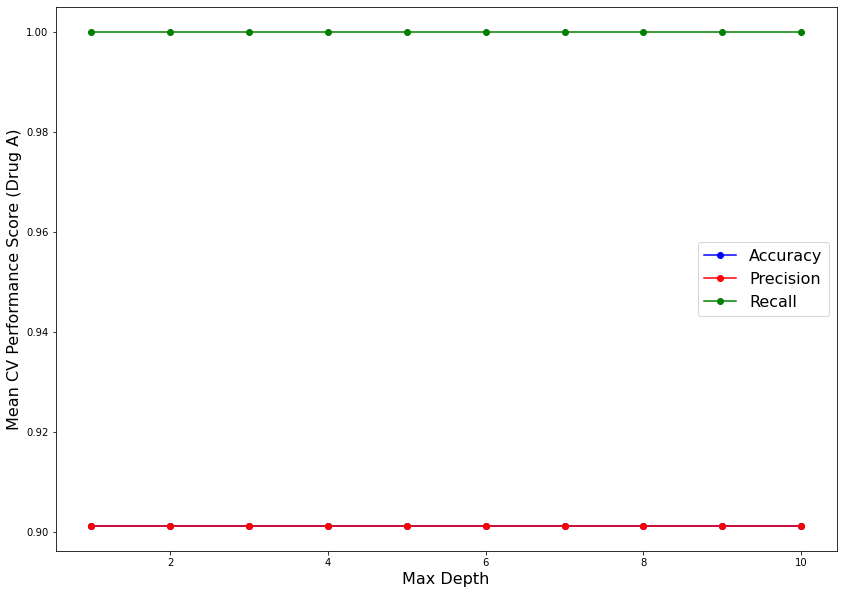

In [23]:
plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(recs,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (Drug A)",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.show()

In [24]:
## Performing 10-fold Cross-validation while iterating max_depth
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
n=10
accs = np.zeros((10,n))
precs = np.zeros((10,n))
recs = np.zeros((10,n))
for j in range(1,n+1):
    tree_clf = DecisionTreeClassifier(max_depth=j,random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_B_train,y_B_train):
        X_train_train,X_train_test = X_B_train.iloc[train_index],X_B_train.iloc[test_index]
        y_train_train,y_train_test = y_B_train.iloc[train_index],y_B_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
        tree_clf_clone = clone(tree_clf)
        tree_clf_clone.fit(X_train_train,y_train_train)
        y_predict = tree_clf_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs[i,j-1] = precision_score(y_train_test,y_predict)
        recs[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs,axis=0))
print("CV Mean Precision is",np.mean(precs,axis=0))
print("CV Mean Recall is",np.mean(recs,axis=0))

CV Mean Accuracy is [0.65742271 0.65742271 0.65828572 0.65828572 0.65828572 0.65828572
 0.65828572 0.65828572 0.65828572 0.65828572]
CV Mean Precision is [0.57460459 0.57460459 0.56035803 0.56035803 0.56035803 0.56035803
 0.56035803 0.56035803 0.56035803 0.56035803]
CV Mean Recall is [0.46831683 0.46831683 0.5747816  0.5747816  0.5747816  0.5747816
 0.5747816  0.5747816  0.5747816  0.5747816 ]


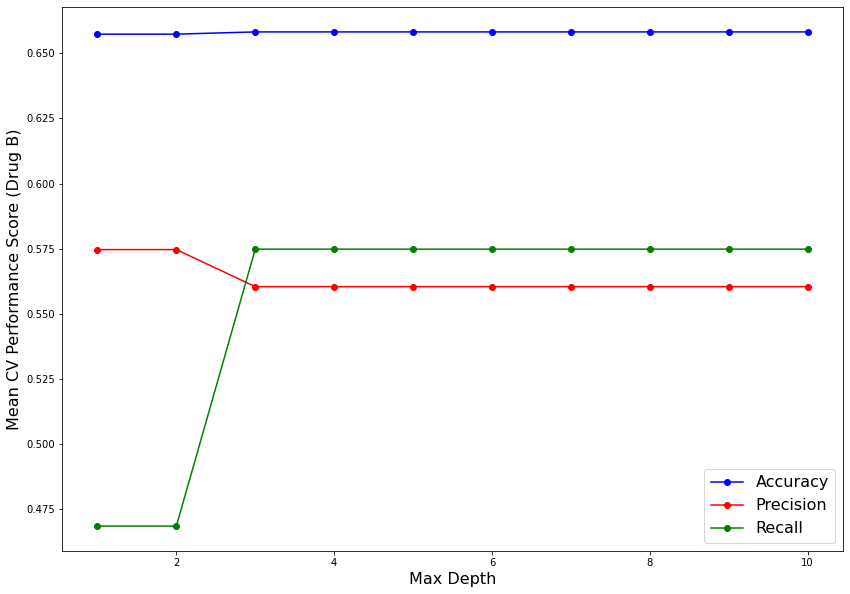

In [25]:
plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(recs,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (Drug B)",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.show()

In [26]:
## Performing 10-fold Cross-validation while iterating max_depth
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
n=10
accs = np.zeros((10,n))
precs = np.zeros((10,n))
recs = np.zeros((10,n))
for j in range(1,n+1):
    tree_clf = DecisionTreeClassifier(max_depth=j,random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_C_train,y_C_train):
        X_train_train,X_train_test = X_C_train.iloc[train_index],X_C_train.iloc[test_index]
        y_train_train,y_train_test = y_C_train.iloc[train_index],y_C_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
        tree_clf_clone = clone(tree_clf)
        tree_clf_clone.fit(X_train_train,y_train_train)
        y_predict = tree_clf_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs[i,j-1] = precision_score(y_train_test,y_predict)
        recs[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs,axis=0))
print("CV Mean Precision is",np.mean(precs,axis=0))
print("CV Mean Recall is",np.mean(recs,axis=0))

CV Mean Accuracy is [0.83411803 0.83710732 0.83710732 0.83710732 0.83710732 0.83710732
 0.83710732 0.83710732 0.83710732 0.83710732]
CV Mean Precision is [0.83411803 0.84214251 0.84214251 0.84214251 0.84214251 0.84214251
 0.84214251 0.84214251 0.84214251 0.84214251]
CV Mean Recall is [1.         0.99035371 0.99035371 0.99035371 0.99035371 0.99035371
 0.99035371 0.99035371 0.99035371 0.99035371]


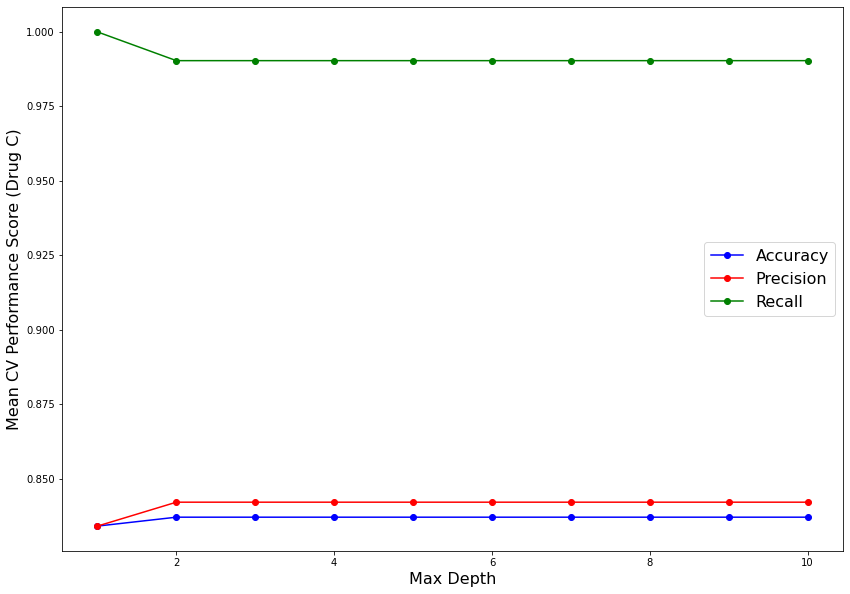

In [27]:
plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(recs,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (Drug C)",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.show()

In [38]:
## Performing 10-fold Cross-validation while iterating max_depth
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
n=10
accs = np.zeros((10,n))
precs = np.zeros((10,n))
recs = np.zeros((10,n))
for j in range(1,n+1):
    tree_clf = DecisionTreeClassifier(max_depth=j,random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_drugs_train,y_drugs_train):
        X_train_train,X_train_test = X_drugs_train.iloc[train_index],X_drugs_train.iloc[test_index]
        y_train_train,y_train_test = y_drugs_train.iloc[train_index],y_drugs_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test
    
        tree_clf_clone = clone(tree_clf)
        tree_clf_clone.fit(X_train_train,y_train_train)
        y_predict = tree_clf_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs[i,j-1] = precision_score(y_train_test,y_predict)
        recs[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs,axis=0))
print("CV Mean Precision is",np.mean(precs,axis=0))
print("CV Mean Recall is",np.mean(recs,axis=0))

CV Mean Accuracy is [0.73457301 0.75667932 0.75675469 0.75650688 0.75650688 0.75650688
 0.75650688 0.75650688 0.75650688 0.75650688]
CV Mean Precision is [0.84711843 0.78548853 0.79624276 0.78982316 0.78982316 0.78982316
 0.78982316 0.78982316 0.78982316 0.78982316]
CV Mean Recall is [0.70589041 0.84416002 0.82511825 0.83618749 0.83618749 0.83618749
 0.83618749 0.83618749 0.83618749 0.83618749]


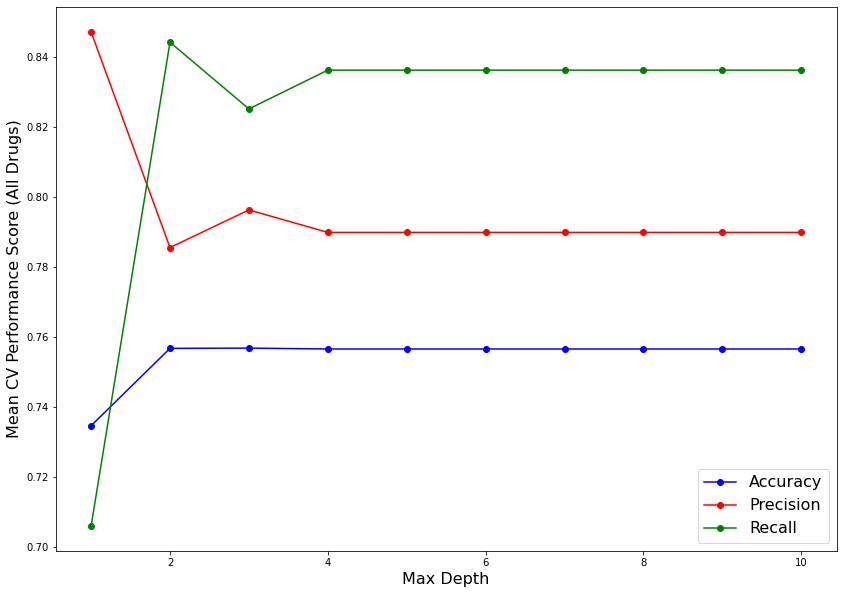

In [39]:
plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(recs,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (All Drugs)",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.show()

### Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
forest = RandomForestClassifier(random_state=440)

In [30]:
## Performing 10-fold Cross-validation while iterating n_estimators
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
trees =np.arange(25,225,25)
accs_rf = np.zeros((10,len(trees)))
precs_rf = np.zeros((10,len(trees)))
recs_rf = np.zeros((10,len(trees)))
for j in range(len(trees)):
    rf_clf = RandomForestClassifier(n_estimators=trees[j-1],random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_A_train,y_A_train):
        X_train_train,X_train_test = X_A_train.iloc[train_index],X_A_train.iloc[test_index]
        y_train_train,y_train_test = y_A_train.iloc[train_index],y_A_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
        rf_clf_clone = clone(rf_clf)
        rf_clf_clone.fit(X_train_train,y_train_train)
        y_predict = rf_clf_clone.predict(X_train_test)
        accs_rf[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs_rf[i,j-1] = precision_score(y_train_test,y_predict)
        recs_rf[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs_rf,axis=0))
print("CV Mean Precision is",np.mean(precs_rf,axis=0))
print("CV Mean Recall is",np.mean(recs_rf,axis=0))

CV Mean Accuracy is [0.90119051 0.90119051 0.90119051 0.90119051 0.90119051 0.90119051
 0.90119051 0.90119051]
CV Mean Precision is [0.90119051 0.90119051 0.90119051 0.90119051 0.90119051 0.90119051
 0.90119051 0.90119051]
CV Mean Recall is [1. 1. 1. 1. 1. 1. 1. 1.]


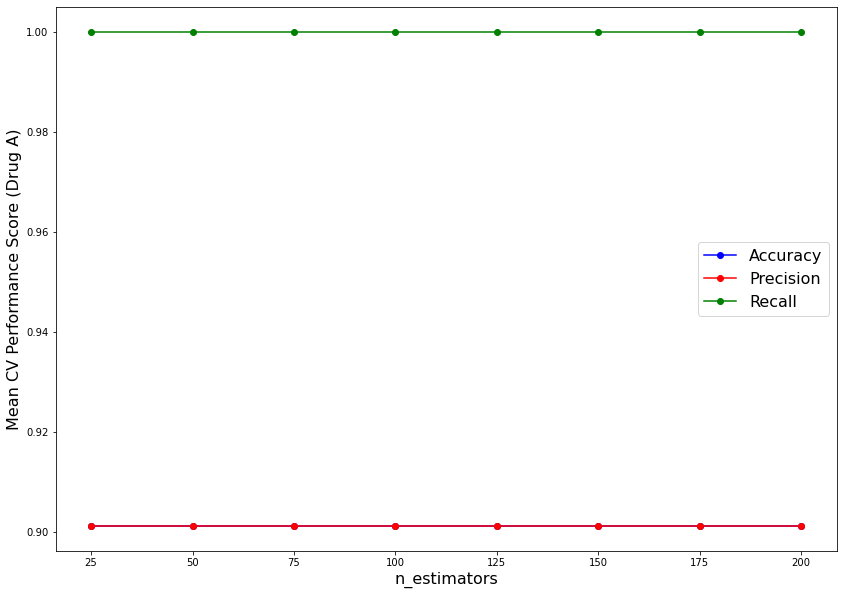

In [31]:
plt.figure(figsize=(14,10))

plt.plot(np.arange(25,225,25), np.mean(accs_rf,axis=0),'b-o', label="Accuracy")
plt.plot(np.arange(25,225,25), np.mean(precs_rf,axis=0),'r-o', label="Precision")
plt.plot(np.arange(25,225,25), np.mean(recs_rf,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (Drug A)",fontsize=16)
plt.xlabel("n_estimators",fontsize=16)

plt.legend(fontsize=16)

plt.show()

CV Mean Accuracy is [0.65828572 0.65828572 0.65828572 0.65828572 0.65828572 0.65828572
 0.65828572 0.65828572]
CV Mean Precision is [0.56035803 0.56035803 0.56035803 0.56035803 0.56035803 0.56035803
 0.56035803 0.56035803]
CV Mean Recall is [0.5747816 0.5747816 0.5747816 0.5747816 0.5747816 0.5747816 0.5747816
 0.5747816]


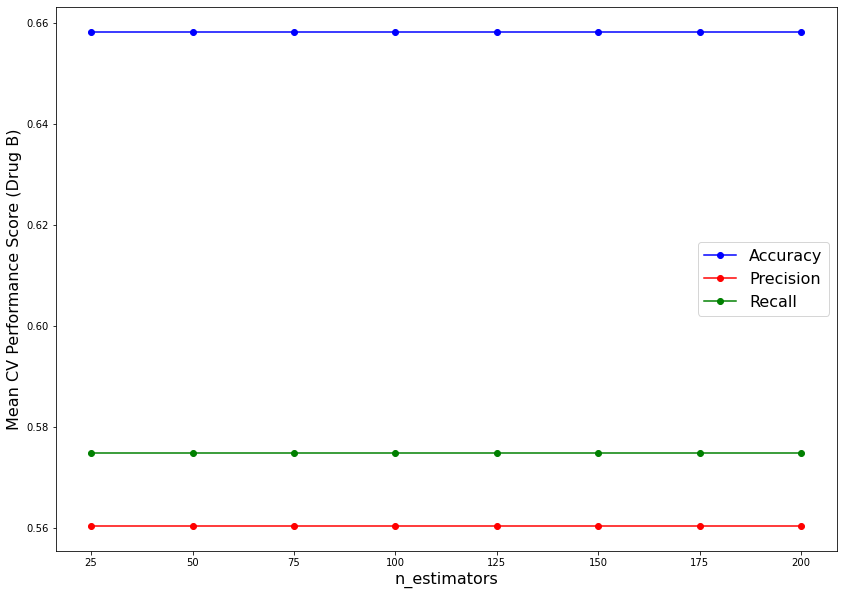

In [32]:
## Performing 10-fold Cross-validation while iterating n_estimators
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
trees =np.arange(25,225,25)
accs_rf = np.zeros((10,len(trees)))
precs_rf = np.zeros((10,len(trees)))
recs_rf = np.zeros((10,len(trees)))
for j in range(len(trees)):
    rf_clf = RandomForestClassifier(n_estimators=trees[j-1],random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_B_train,y_B_train):
        X_train_train,X_train_test = X_B_train.iloc[train_index],X_B_train.iloc[test_index]
        y_train_train,y_train_test = y_B_train.iloc[train_index],y_B_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
        rf_clf_clone = clone(rf_clf)
        rf_clf_clone.fit(X_train_train,y_train_train)
        y_predict = rf_clf_clone.predict(X_train_test)
        accs_rf[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs_rf[i,j-1] = precision_score(y_train_test,y_predict)
        recs_rf[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs_rf,axis=0))
print("CV Mean Precision is",np.mean(precs_rf,axis=0))
print("CV Mean Recall is",np.mean(recs_rf,axis=0))
plt.figure(figsize=(14,10))

plt.plot(np.arange(25,225,25), np.mean(accs_rf,axis=0),'b-o', label="Accuracy")
plt.plot(np.arange(25,225,25), np.mean(precs_rf,axis=0),'r-o', label="Precision")
plt.plot(np.arange(25,225,25), np.mean(recs_rf,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (Drug B)",fontsize=16)
plt.xlabel("n_estimators",fontsize=16)

plt.legend(fontsize=16)

plt.show()


CV Mean Accuracy is [0.83710732 0.83710732 0.83710732 0.83710732 0.83710732 0.83710732
 0.83710732 0.83710732]
CV Mean Precision is [0.84214251 0.84214251 0.84214251 0.84214251 0.84214251 0.84214251
 0.84214251 0.84214251]
CV Mean Recall is [0.99035371 0.99035371 0.99035371 0.99035371 0.99035371 0.99035371
 0.99035371 0.99035371]


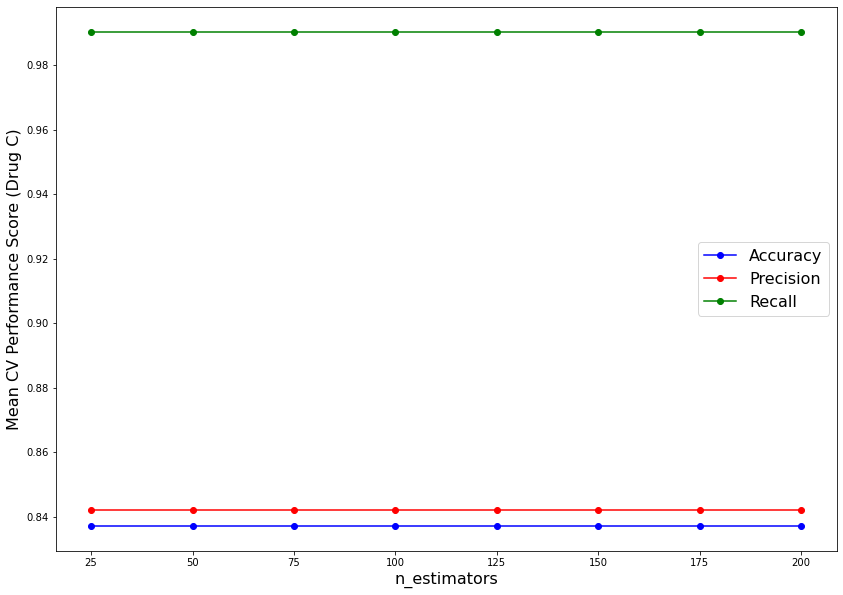

In [33]:
## Performing 10-fold Cross-validation while iterating n_estimators
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
trees =np.arange(25,225,25)
accs_rf = np.zeros((10,len(trees)))
precs_rf = np.zeros((10,len(trees)))
recs_rf = np.zeros((10,len(trees)))
for j in range(len(trees)):
    rf_clf = RandomForestClassifier(n_estimators=trees[j-1],random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_C_train,y_C_train):
        X_train_train,X_train_test = X_C_train.iloc[train_index],X_C_train.iloc[test_index]
        y_train_train,y_train_test = y_C_train.iloc[train_index],y_C_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
        rf_clf_clone = clone(rf_clf)
        rf_clf_clone.fit(X_train_train,y_train_train)
        y_predict = rf_clf_clone.predict(X_train_test)
        accs_rf[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs_rf[i,j-1] = precision_score(y_train_test,y_predict)
        recs_rf[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs_rf,axis=0))
print("CV Mean Precision is",np.mean(precs_rf,axis=0))
print("CV Mean Recall is",np.mean(recs_rf,axis=0))
plt.figure(figsize=(14,10))

plt.plot(np.arange(25,225,25), np.mean(accs_rf,axis=0),'b-o', label="Accuracy")
plt.plot(np.arange(25,225,25), np.mean(precs_rf,axis=0),'r-o', label="Precision")
plt.plot(np.arange(25,225,25), np.mean(recs_rf,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (Drug C)",fontsize=16)
plt.xlabel("n_estimators",fontsize=16)

plt.legend(fontsize=16)

plt.show()


CV Mean Accuracy is [0.75716408 0.75663616 0.75663616 0.75663616 0.75663616 0.75663616
 0.75663616 0.75663616]
CV Mean Precision is [0.78571588 0.78855297 0.78855297 0.78855297 0.78855297 0.78855297
 0.78855297 0.78855297]
CV Mean Recall is [0.84535772 0.83902753 0.83902753 0.83902753 0.83902753 0.83902753
 0.83902753 0.83902753]


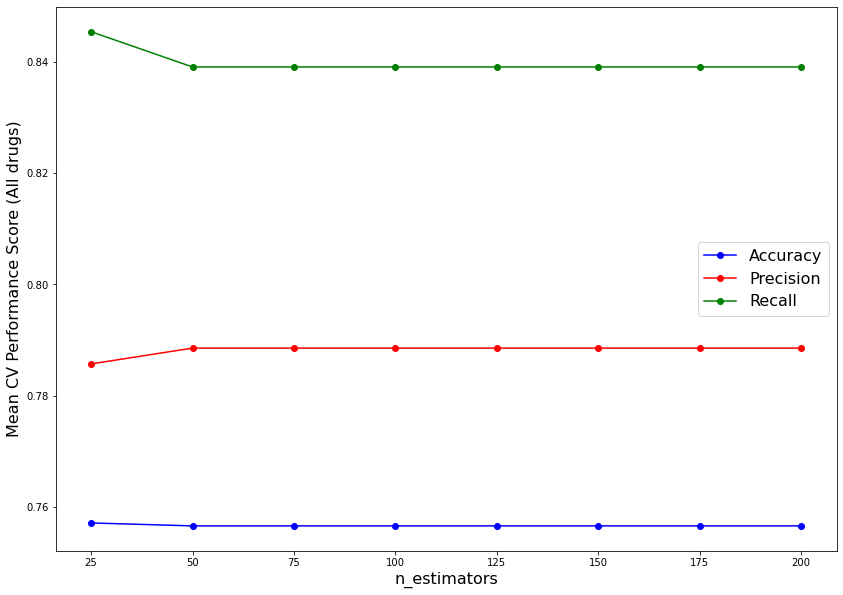

In [40]:
## Performing 10-fold Cross-validation while iterating n_estimators
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
trees =np.arange(25,225,25)
accs_rf = np.zeros((10,len(trees)))
precs_rf = np.zeros((10,len(trees)))
recs_rf = np.zeros((10,len(trees)))
for j in range(len(trees)):
    rf_clf = RandomForestClassifier(n_estimators=trees[j-1],random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_drugs_train,y_drugs_train):
        X_train_train,X_train_test = X_drugs_train.iloc[train_index],X_drugs_train.iloc[test_index]
        y_train_train,y_train_test = y_drugs_train.iloc[train_index],y_drugs_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
        rf_clf_clone = clone(rf_clf)
        rf_clf_clone.fit(X_train_train,y_train_train)
        y_predict = rf_clf_clone.predict(X_train_test)
        accs_rf[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs_rf[i,j-1] = precision_score(y_train_test,y_predict)
        recs_rf[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs_rf,axis=0))
print("CV Mean Precision is",np.mean(precs_rf,axis=0))
print("CV Mean Recall is",np.mean(recs_rf,axis=0))
plt.figure(figsize=(14,10))

plt.plot(np.arange(25,225,25), np.mean(accs_rf,axis=0),'b-o', label="Accuracy")
plt.plot(np.arange(25,225,25), np.mean(precs_rf,axis=0),'r-o', label="Precision")
plt.plot(np.arange(25,225,25), np.mean(recs_rf,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (All drugs)",fontsize=16)
plt.xlabel("n_estimators",fontsize=16)

plt.legend(fontsize=16)

plt.show()



CV Mean Accuracy is [0.75634527 0.75622678 0.75622678 0.75622678 0.75622678 0.75622678
 0.75622678 0.75622678]
CV Mean Precision is [0.78040701 0.77897201 0.77897201 0.77897201 0.77897201 0.77897201
 0.77897201 0.77897201]
CV Mean Recall is [0.85348427 0.85603346 0.85603346 0.85603346 0.85603346 0.85603346
 0.85603346 0.85603346]


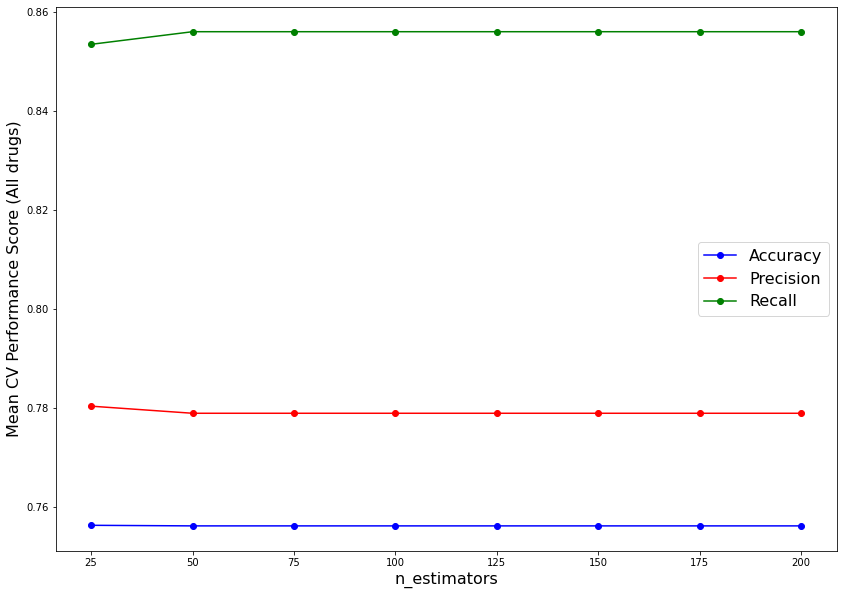

In [72]:
## Performing 10-fold Cross-validation while iterating n_estimators
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
trees =np.arange(25,225,25)
accs_rf = np.zeros((10,len(trees)))
precs_rf = np.zeros((10,len(trees)))
recs_rf = np.zeros((10,len(trees)))
for j in range(len(trees)):
    rf_clf = RandomForestClassifier(n_estimators=trees[j-1],random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_train,y_train):
        X_train_train,X_train_test = X_train.iloc[train_index],X_train.iloc[test_index]
        y_train_train,y_train_test = y_train.iloc[train_index],y_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
        rf_clf_clone = clone(rf_clf)
        rf_clf_clone.fit(X_train_train,y_train_train)
        y_predict = rf_clf_clone.predict(X_train_test)
        accs_rf[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs_rf[i,j-1] = precision_score(y_train_test,y_predict)
        recs_rf[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs_rf,axis=0))
print("CV Mean Precision is",np.mean(precs_rf,axis=0))
print("CV Mean Recall is",np.mean(recs_rf,axis=0))
plt.figure(figsize=(14,10))

plt.plot(np.arange(25,225,25), np.mean(accs_rf,axis=0),'b-o', label="Accuracy")
plt.plot(np.arange(25,225,25), np.mean(precs_rf,axis=0),'r-o', label="Precision")
plt.plot(np.arange(25,225,25), np.mean(recs_rf,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (All drugs)",fontsize=16)
plt.xlabel("n_estimators",fontsize=16)

plt.legend(fontsize=16)

plt.show()
